# Medical Cost Personal Insurance Project

## Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated 

Columns                                            
  1) age: age of primary beneficiary
  
  2) sex: insurance contractor gender, female, male
  
  3) bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body     weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.
  
  4) children: Number of children covered by health insurance / Number of dependents 
  
  5) smoker: Smoking 
  
  6) region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
  
  7) charges: Individual medical costs billed by health insurance


###### Predict : Can you accurately predict insurance costs?

### Let's Import all the required Libraries at once

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#import zscore for the removal of outliers
import scipy.stats as stats
from scipy.stats import zscore

#Import SMOTE from imblearn 
from imblearn.over_sampling import SMOTE

# Lets Import all the libraries for scaling, Building Machine Learning Models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

#Import Joblib for saving the project
import joblib

In [2]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The Data set contains 1338 Rows and 7 Columns. Out of which Age, bmi, Children, Charges are the columns which contains Numerical data and Sex, Smoker and Region are the columns containing Categorical data.
Lets go through the data set and find the issues and problems in it to proceed for Data Cleaning

In [3]:
#Lets check head of the DataFrame retrieved using df.head()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Lets check tail of the DataFrame retrieved using df.head()
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


From both, Head and Tail we can observe that all the columns are containing similar numerical and categorical data values

For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

# Exploratory Data Analysis (EDA)

## Non-Graphical Analysis

In [5]:
#Let's check the dimensions of the data set using shape 
df.shape

(1338, 7)

Shape method is giving the same information what we find from DataFrame that is prepared from the .csv file and all the rows and columns matches

In [6]:
#Let's check the names of the Columns for later usage
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Here, with the columns method, we could able to identify the major column names and all are showing as Object Data Type

In [7]:
#checking the dimensions of the internet 
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

With this we could convert the DataFrame Columns to the List and checked

In [8]:
#Let's check the data types of the columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

From the above, we can observe that, age and children columns are of int64 data type. sex, smoker, region are in object data type. 
bmi and charges are of float64 data types. thus we can conlcude that totally three (3) different data types are present in the data set

In [9]:
#Checking the Null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

with isnull.sum() method, its clear that there are no Null Values in any column. we can check the total null values in the DataFrame by taking total sum

In [10]:
#Check the Sum of NULL Values in the total DataFrame
df.isnull().sum().sum()

0

Now, It's Very clear that the entire DataFrame contains No Null Values

In [11]:
#Fetching the information about the DataFrame with Non Null Values and Data Type of the Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It Gives the information that, all the 7 Columns have same number of values and they are all Non Null Values. Among all the columns, age and children are of INT Data Type, sex, smoker and region are of OBJECT data type. bmi and charges are of FLOAT data type. Our Target Variable is Float Data Type. Memory Usage of the DataSet is 73.3+ KB. So, It's compulsory for model building to convert categorical data into numerical data before building.

##### Let's check the unique values and all the information in each column

In [12]:
#Gives Unique Values
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [13]:
#Gives Total Number of Unique Values in our target variable
df['charges'].nunique()

1337

It can be understood that there are 1337 unique types are there in CHARGES Column. In the similiar way we can find the unique values under each column. But we can use Value_counts function with a FOR Loop to find all details together

In [14]:
#Checking the value counts of each Column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

We can see and observe the Unique values as well as Count of unique values and the length for each column

<AxesSubplot:>

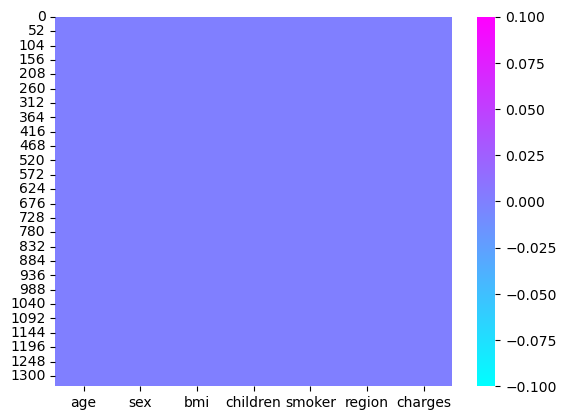

In [15]:
#Lets Visuliza using Heat Map to find out the presence of NULL Values
sns.heatmap(df.isnull(),cmap="cool")

The Heat map shows that, there are no null values in the given data set

Since, there are categorical data present in the data set, we need to separate them. 
Later we can apply all the operations using regular procedure

In [16]:
#Let's implement describe to return the description of the data in the DataFrame
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Since, the describe() method is used to return the description of the data in the given DataFrame, we use it to find out the description of 
Numerical data which gives the final conclusion and information as follows in the each column
We won't find analysis of skewness or outliers in categorical data and also in the target variable.

1) COUNT: The Counts of all coulmns are same without missing any data

2) MEAN: The Mean Value is almost same in all Age, BMI and Children Columns so, we say there is no skewness and it results that outliers will also be minimum.

3) The data in charges Column have mean less less than medain, but since it is target variable so, we won't consider it for treatment.

4) By Observing and summerizing the data we can observe that there is a minor difference between 75% and Max Value in the columns age, bmi and children hence there are less number Outliers in these columns and we need to remove them using ZSCORE Method.

5) We can also observe that the standard deviation is corrected sample standard deviation, 25% percentile are calculated in the describe method

## Data Visualization

Since, we find out the statistical summary of Numerical Columns, Skewness and Outliers information in the form of Numerical values, now lets go for putting the same in the form of Graphical analysis starting from depicting the Count of each values to all the other graphical findings.

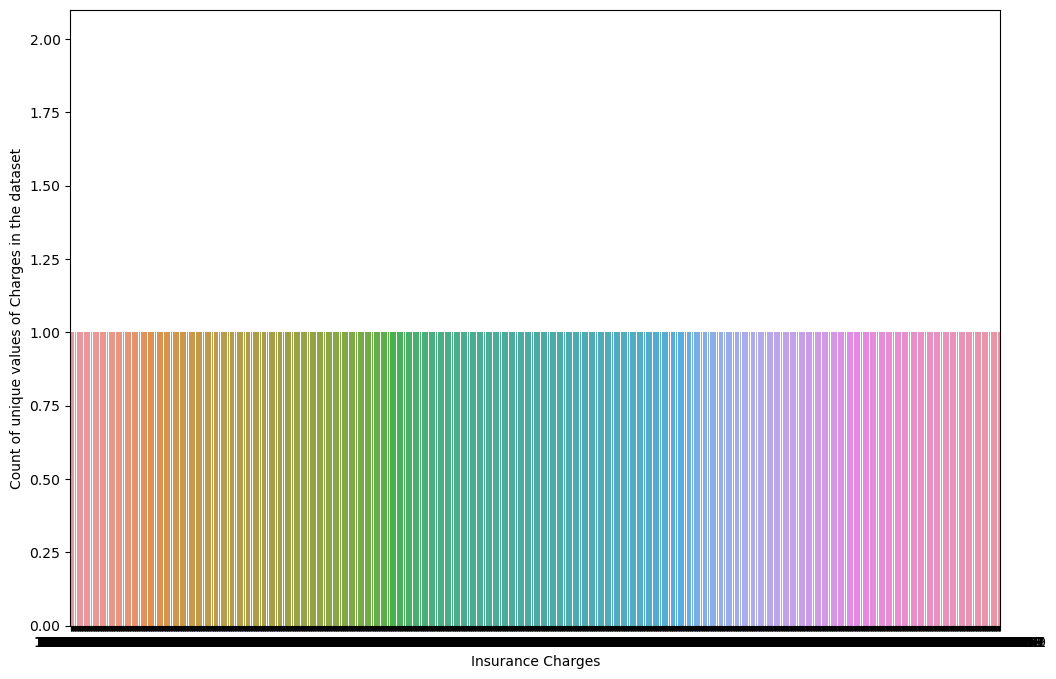

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x ='charges', data = df)
plt.xlabel('Insurance Charges')
plt.ylabel('Count of unique values of Charges in the dataset')
plt.show()

We can see that, the total count of number of columns are 1338 and total charges count is 1337 and almost every value is unique and are same count throughout the Data set

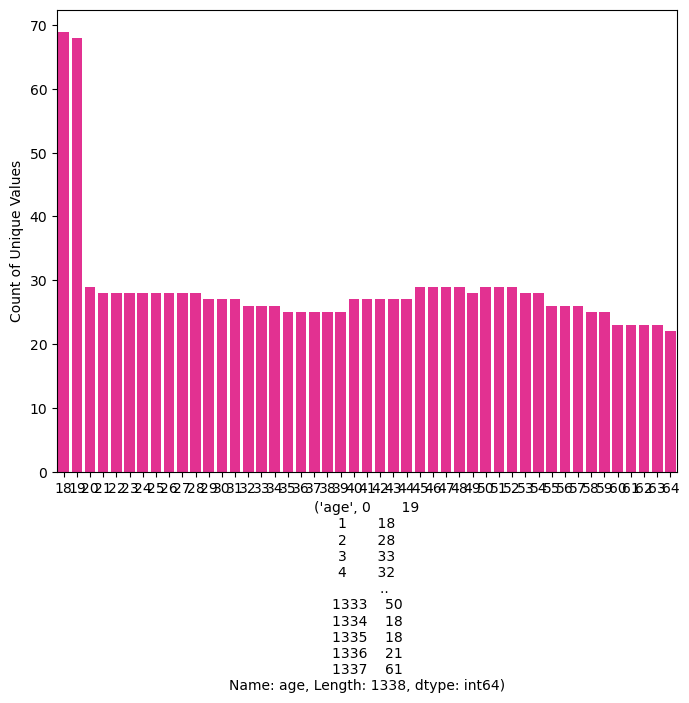

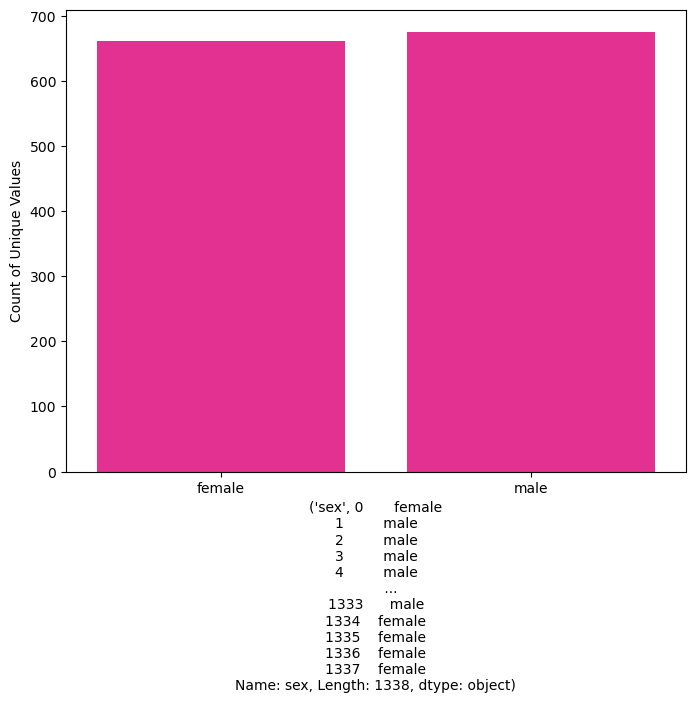

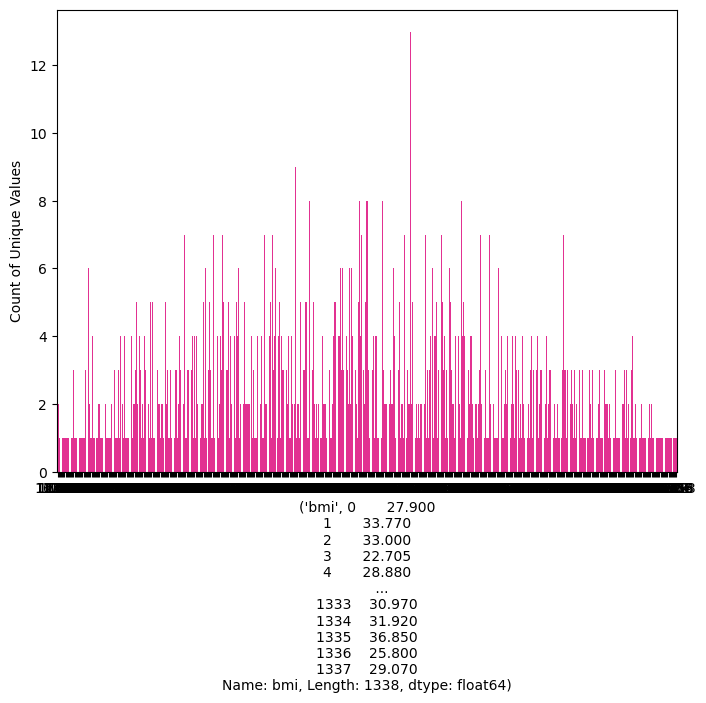

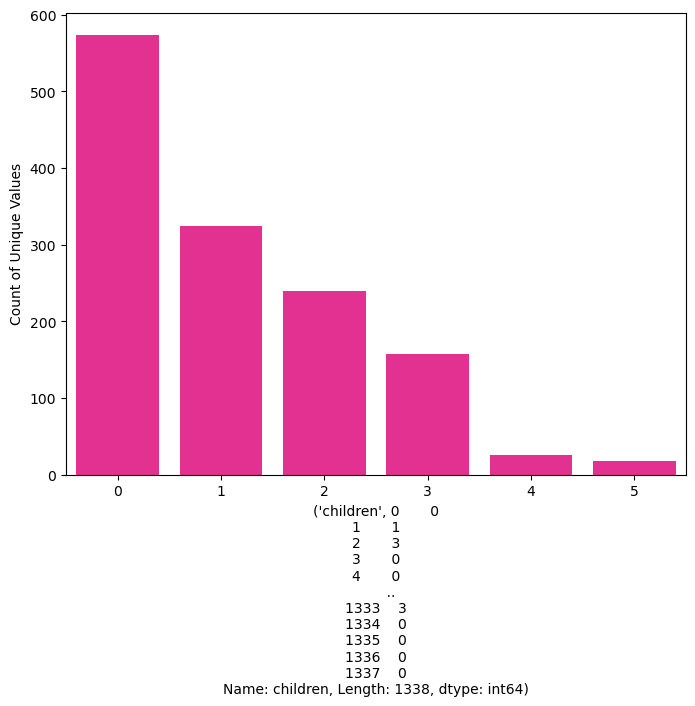

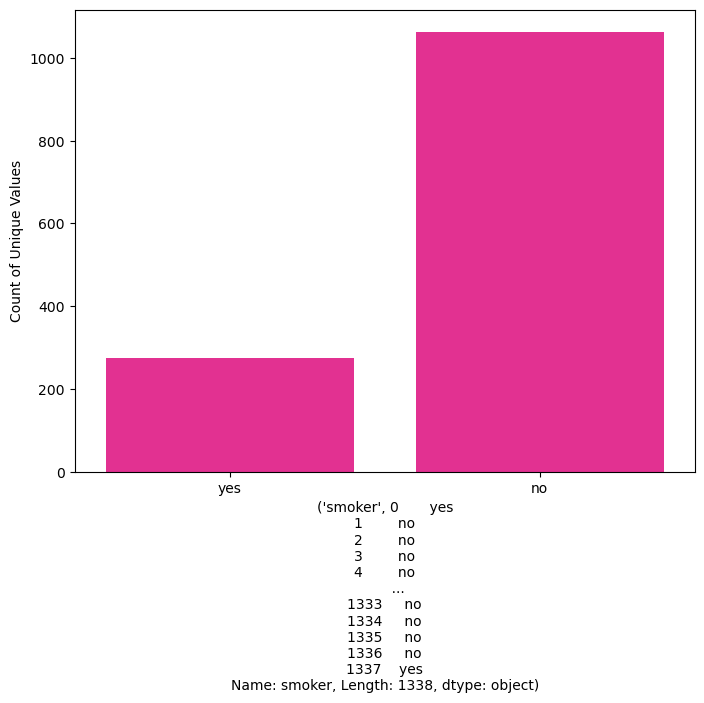

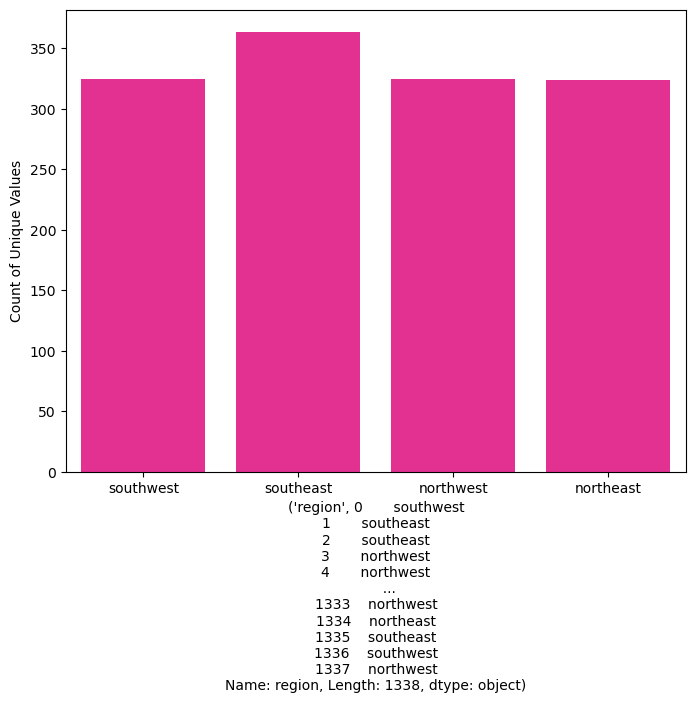

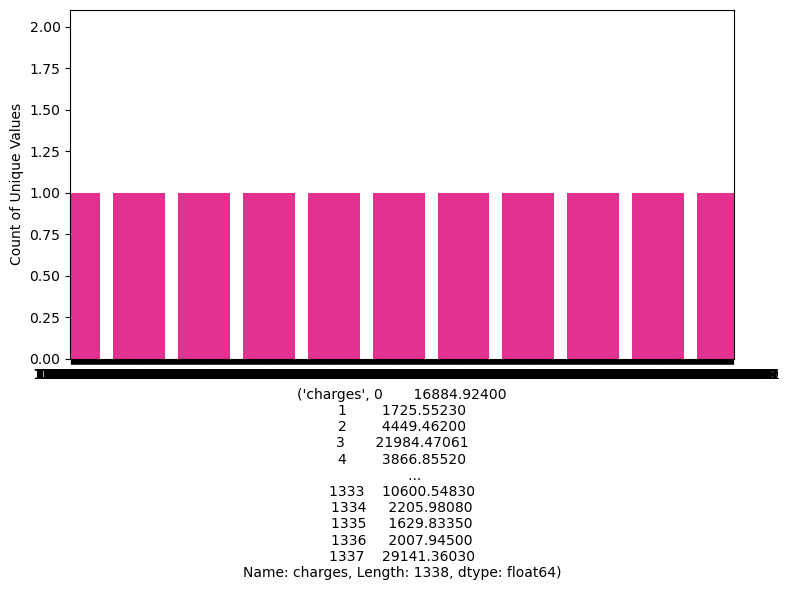

In [18]:
#Let's Plot Countplot for each column in the DataFrame
index=0
for col in df.items():
    plt.figure(figsize=(8,6))
    sns.countplot(x=col[index], data=df, color="deeppink")
    plt.xlabel(col)
    plt.ylabel('Count of Unique Values')
plt.tight_layout()
plt.show()

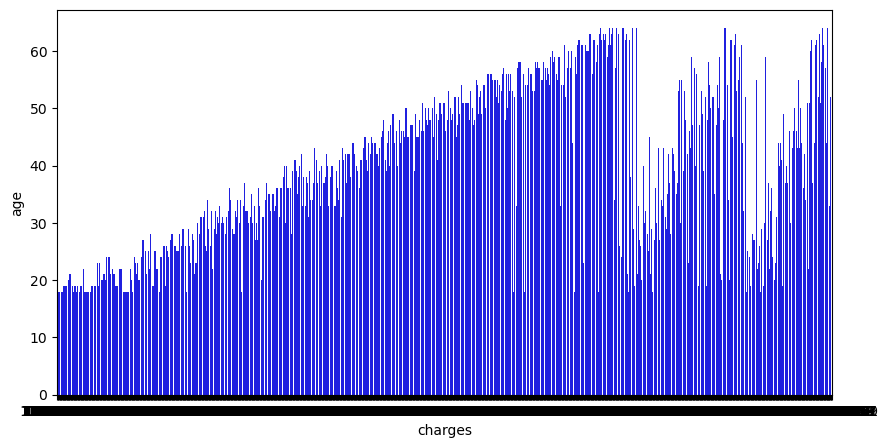

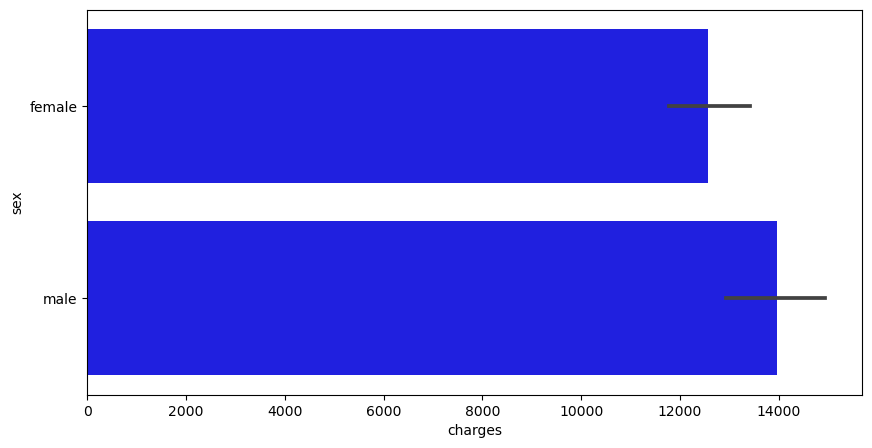

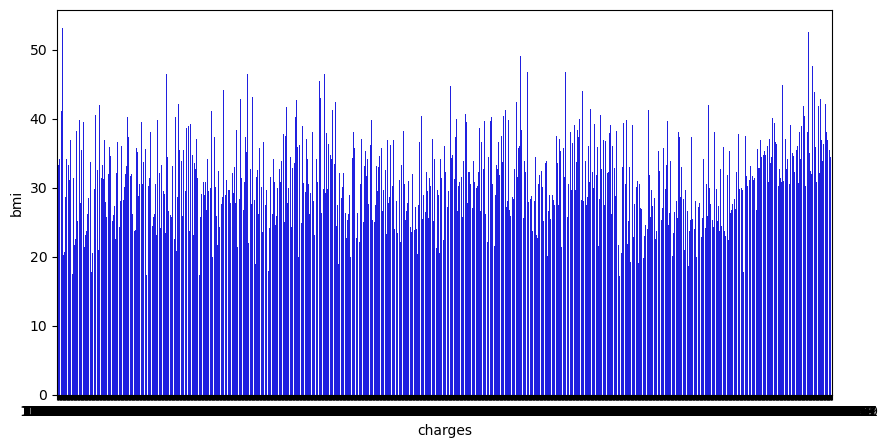

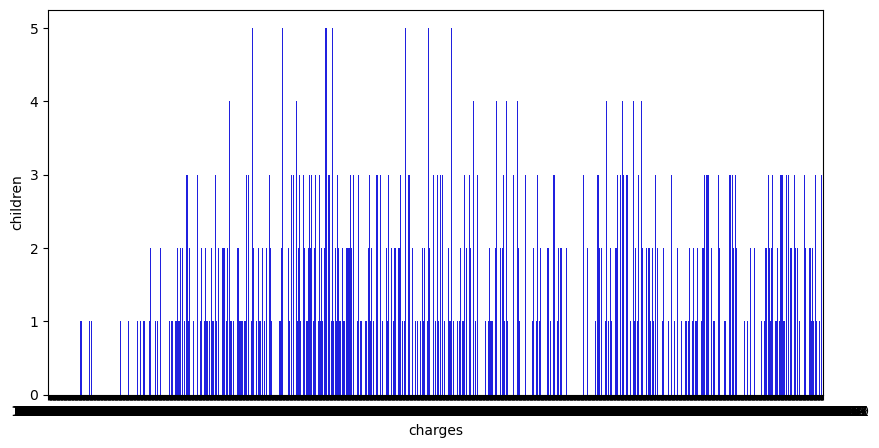

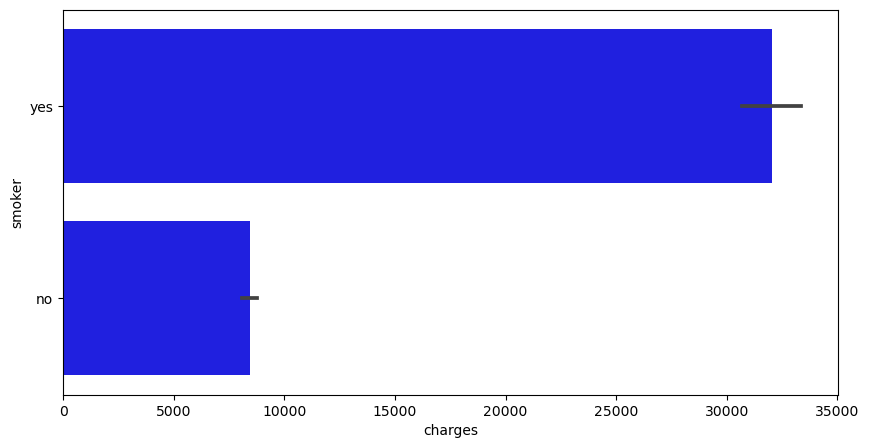

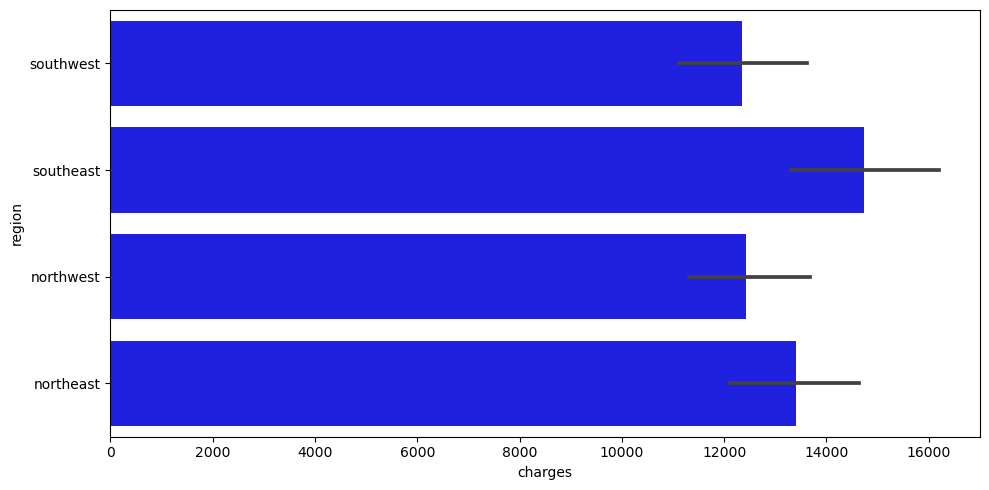

In [19]:
count=0 #Lets initialize a counter
df_target = df['charges'] #Setting Target variable
df_features = df.drop('charges', axis=1) #Identifying Features and seperating them from target variables

for i in df_features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=df_target, y=i[count], data=df, color="blue")

plt.tight_layout()
plt.show()

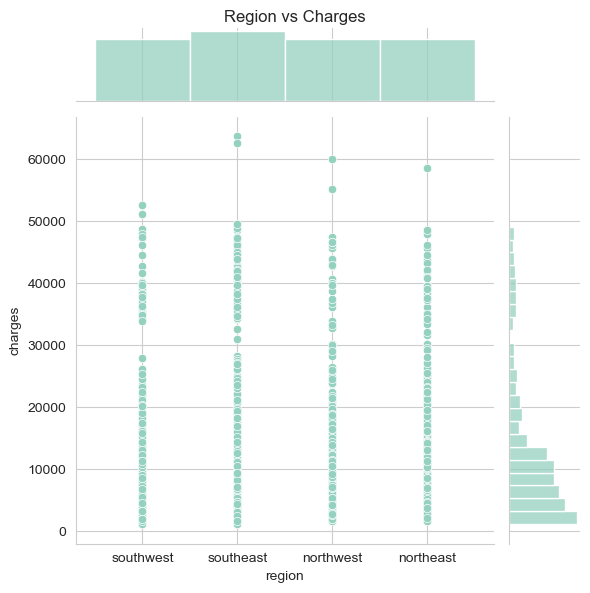

In [20]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
p=sns.jointplot(x='region',y='charges',data=df)
p.fig.suptitle('Region vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

**The number of insured people in the southeast is slightly higher than in others.**
<br> **The most of people's medical costs billed by health insurance are under $15,000.**

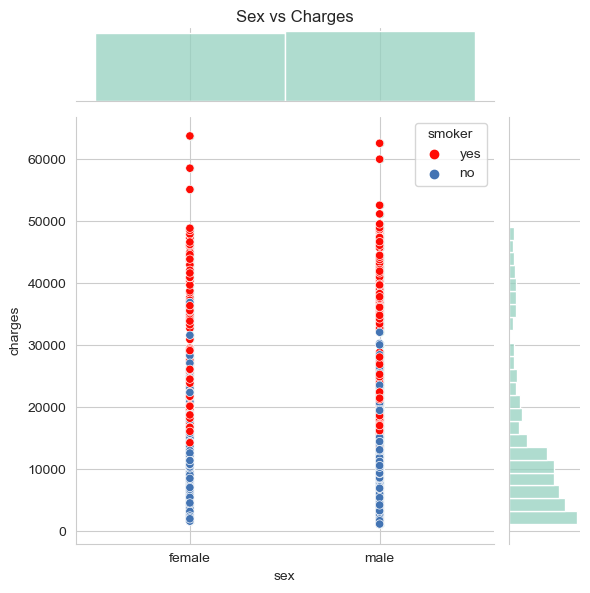

In [21]:
p=sns.jointplot(x='sex',y='charges',data=df)
p.fig.suptitle('Sex vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=df)

**There is no significant difference between male and female.**

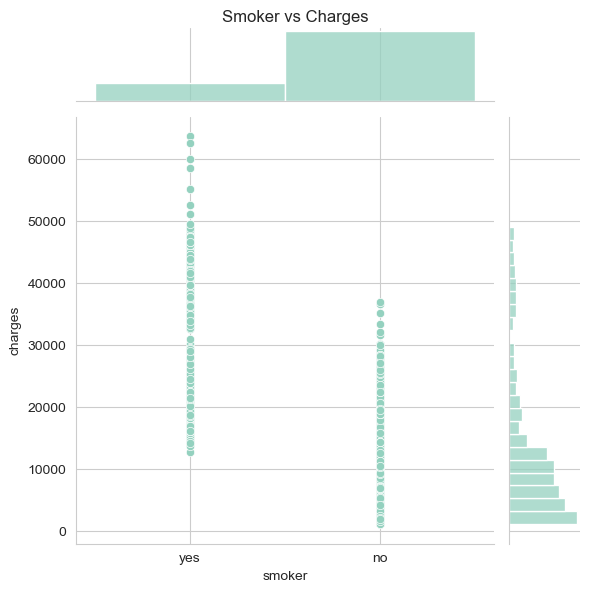

In [22]:
sns.set_palette("GnBu_d")
p=sns.jointplot(x='smoker',y='charges',data=df)
p.fig.suptitle('Smoker vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

The smokers have higher medical cost, and only the smokers have the cost over $40,000.

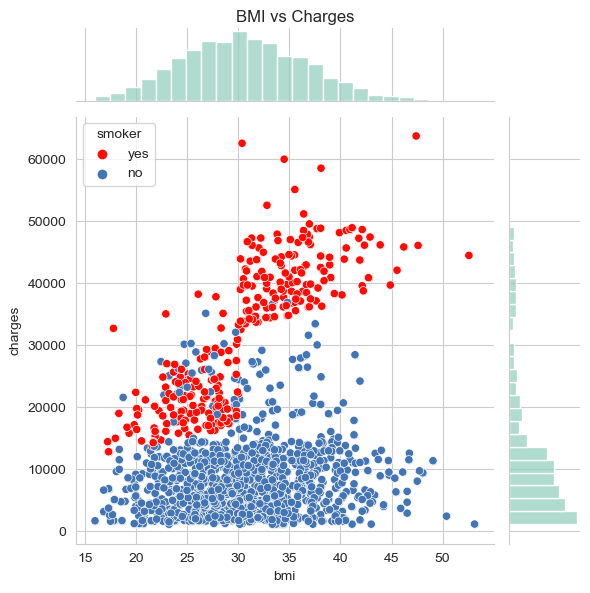

In [23]:
p=sns.jointplot(x='bmi',y='charges',data=df)
p.fig.suptitle('BMI vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=df)

The distribution of BMI seems to be normal distribution.

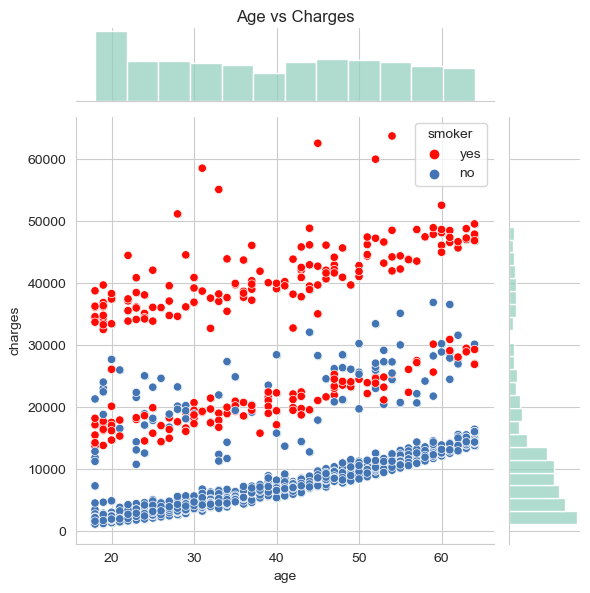

In [24]:
sns.set_palette("GnBu_d")
p=sns.jointplot(x='age',y='charges',data=df)
p.fig.suptitle('Age vs Charges')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
g = p.plot_joint(sns.scatterplot, hue='smoker', data=df)

From the plots above, I assume the insured people to three groups(Low risk, medium risk, and high risk)

There are positve linear correlation between age and charge in all three groups, and the variance for medium and high risks are much higher than low risk.


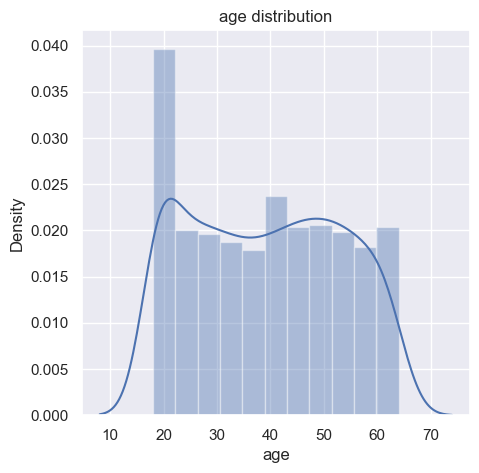

In [25]:
#distribution  of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['age'])# distplot tells us the distribution of the dataset throghtout
plt.title('age distribution')
plt.show()

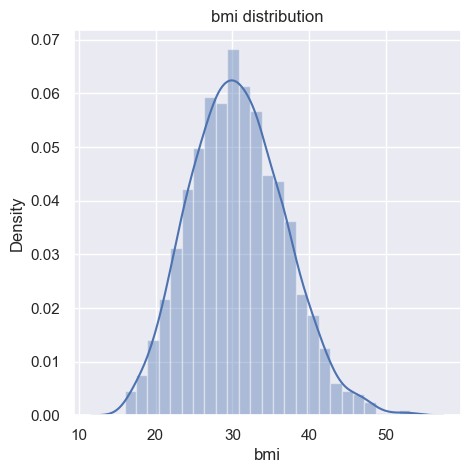

In [26]:
#distribution  of bmi
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])# distplot tells us the distribution of the dataset throghtout
plt.title('bmi distribution')
plt.show()

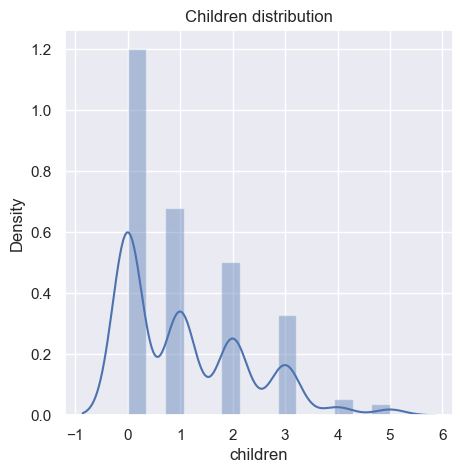

In [27]:
#distribution  of children
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['children'])# distplot tells us the distribution of the dataset throghtout
plt.title('Children distribution')
plt.show()

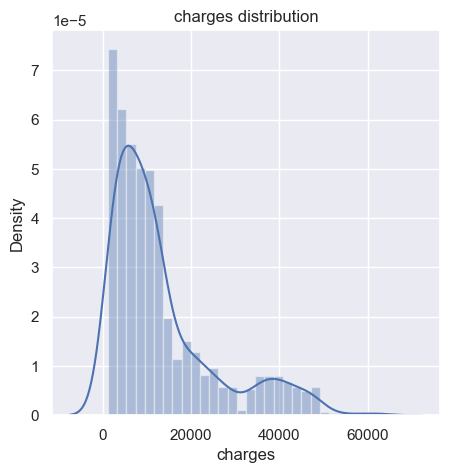

In [28]:
#distribution  of charges
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['charges'])# distplot tells us the distribution of the dataset throghtout
plt.title('charges distribution')
plt.show()

Since, Charges are the target column we don't consider the skewness or outliers.
other columns are in zero skewness and outliers very less. so no need of any updates regarding the EDA.

### Let's Convert the categorical columns into Numerical columns

In [29]:
#Encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [31]:
x=df.drop(columns='charges',axis=1)# we are dropping the charges column and swaving in x
y=df['charges']# we are saving the charges column in y

In [32]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Spliting the data into the train and test

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [35]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape, y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


## Training the Model

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
# loading the linesar regression model
reg=LinearRegression()
reg

LinearRegression()

In [38]:
reg.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [39]:
# Prediction On training Data
train_pred=reg.predict(x_train)

In [40]:
# R Squared value ( it lies in the range of 0 to 1 )
r2_train= metrics.r2_score(y_train,train_pred)
print('R  Squared value :',r2_train)

R  Squared value : 0.751505643411174


In [41]:
test_pred=reg.predict(x_test)
r2_test=metrics.r2_score(y_test,test_pred)
print('R  Squared value :',r2_test)

R  Squared value : 0.7447273869684077


## Building the Preductive System

In [42]:
input_data=(31,1,25.74,0,1,0)
# changing the input data into the numpy array
num_array=np.asarray(input_data)

#reshaping the array
reshaped_num_array=num_array.reshape(1,-1)

prediction=reg.predict(reshaped_num_array)
print(prediction)
print('The insurance cost is USD ',prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496055


In [43]:
input_data=(29,0,28.74,1,1,1)
# changing the input data into the numpy array
num_array=np.asarray(input_data)

#reshaping the array
reshaped_num_array=num_array.reshape(1,-1)

prediction=reg.predict(reshaped_num_array)
print(prediction)
print('The insurance cost is USD ',prediction[0])

[5015.58909787]
The insurance cost is USD  5015.58909786784
